# Hacktiv8-PTP Python For Data Science // S.8.1 // Advanced Visualization

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [ ]:
df_can = pd.read_excel('datasets/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
print(df_can.shape)

(195, 43)


In [ ]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-5-9a7336a2f1d9>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


## Visualizing Data using Matplotlib

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot') #optional:for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) #check for latest version of matplotlib

Matplotlib version:  3.7.1


### Waffle Charts(optional)

In [ ]:
#lets create a new datframe for these three counries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [ ]:
#menentukan proporsi setiap kategori sehubungan dengan totalnya
total_values=sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [ ]:
width = 40
height = 10

total_num_tiles=width*height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [ ]:
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [ ]:
waffle_chart = np.zeros((height, width))

category_index=0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

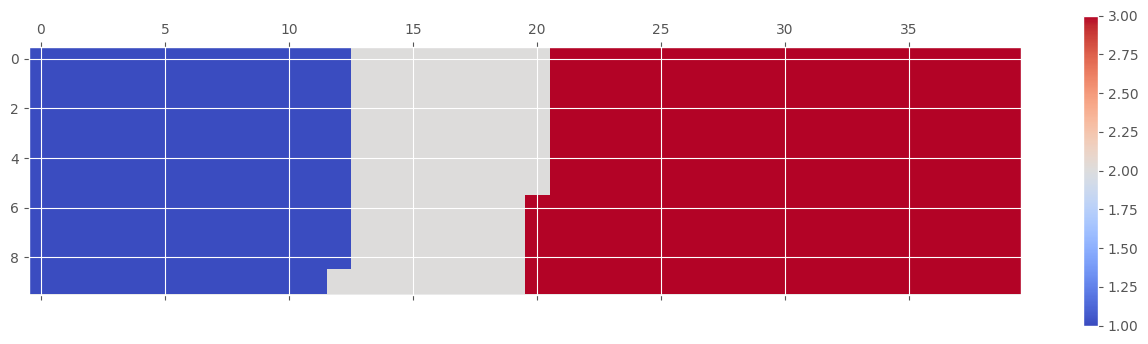

In [ ]:
fig=plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

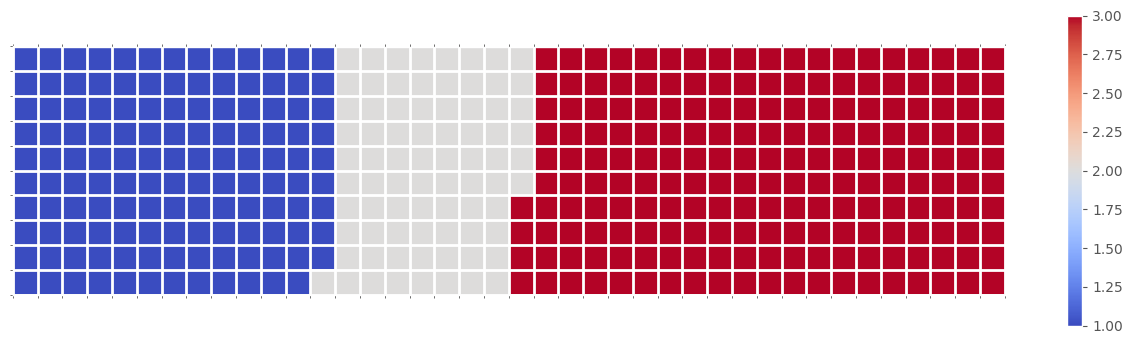

In [ ]:
fig = plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca() # get the axis

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

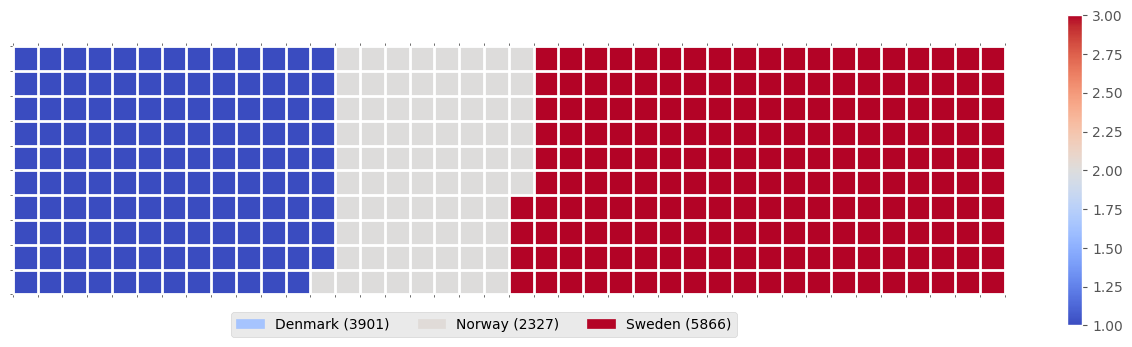

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
width = 40
height=10

categories = df_dsn.index.values
values=df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

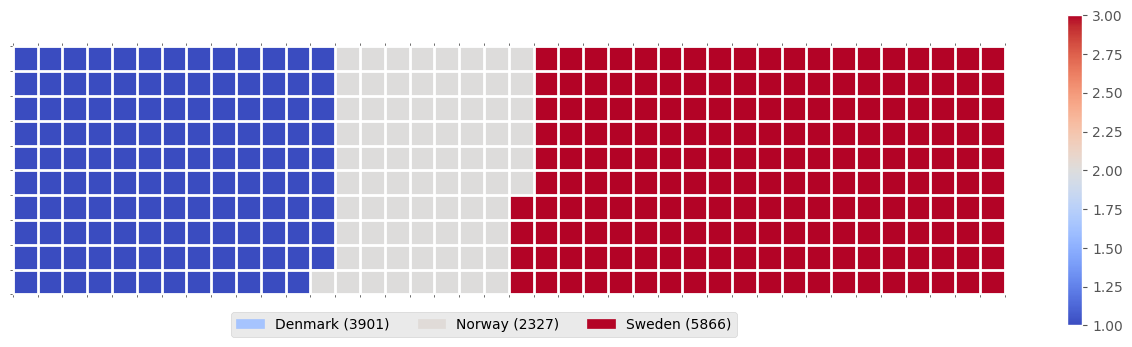

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

### WordClouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [ ]:
alice_novel = open('datasets/alice_novel.txt', 'r').read()
print('File downloaded and saved!')

File downloaded and saved!


In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
alice_wc = WordCloud(background_color='black', max_words=2000, stopwords=stopwords)
alice_wc.generate(alice_novel)

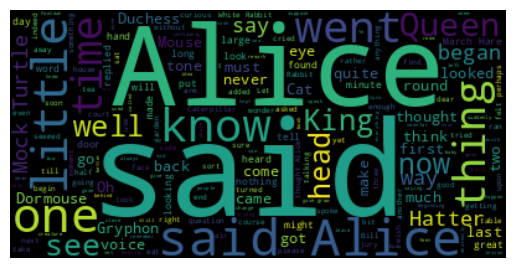

In [ ]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

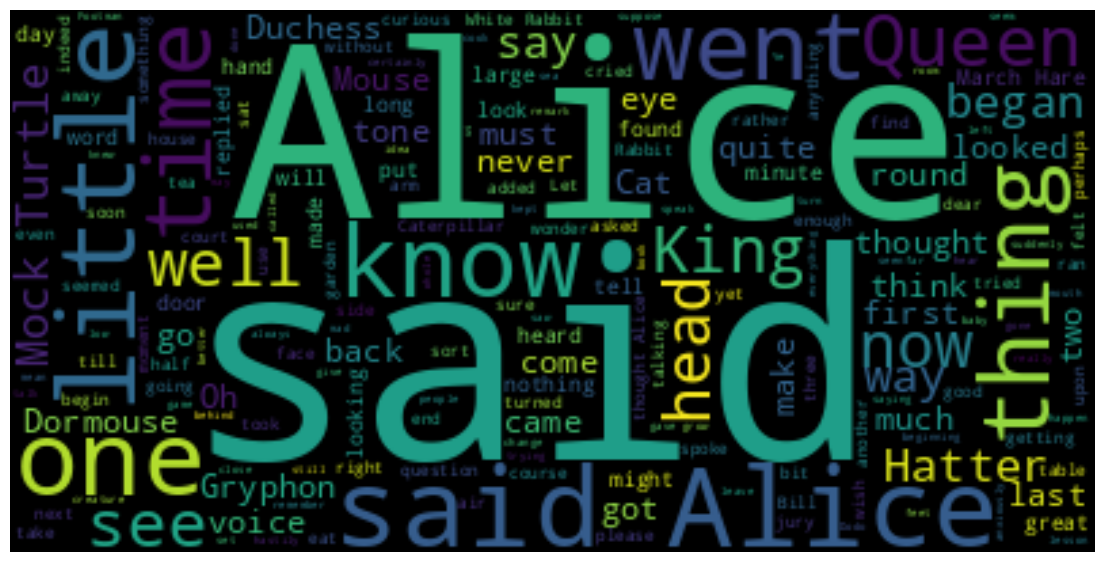

In [ ]:
fig = plt.figure()
fig.set_figheight(18)
fig.set_figwidth(14)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

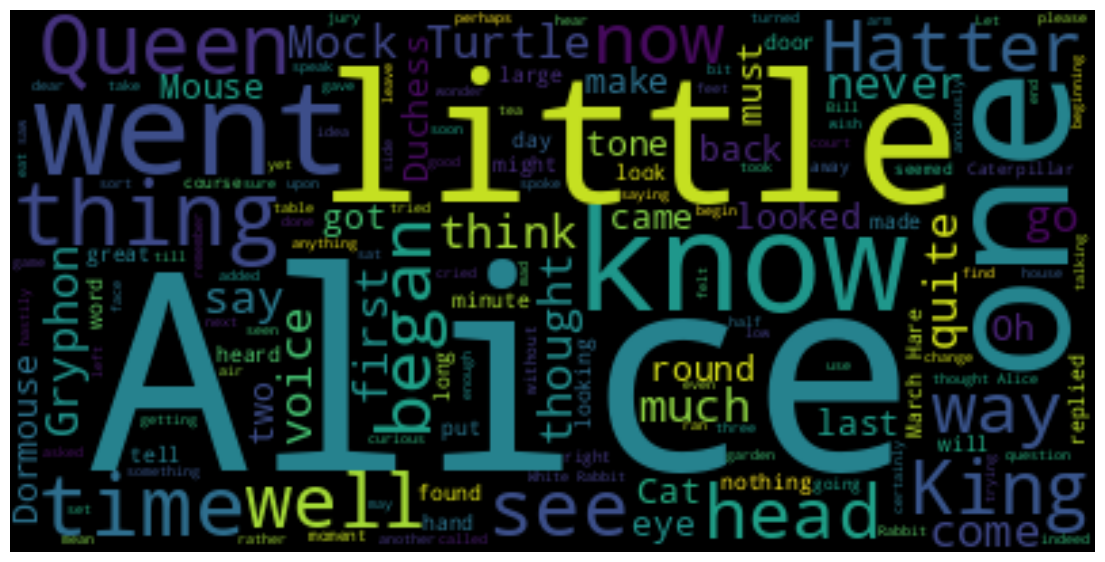

In [ ]:
stopwords.add('said') # add the words said to stopwords
alice_wc.generate(alice_novel) # re-generate the word cloud

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
alice_mask = np.array(Image.open('datasets/alice_mask.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


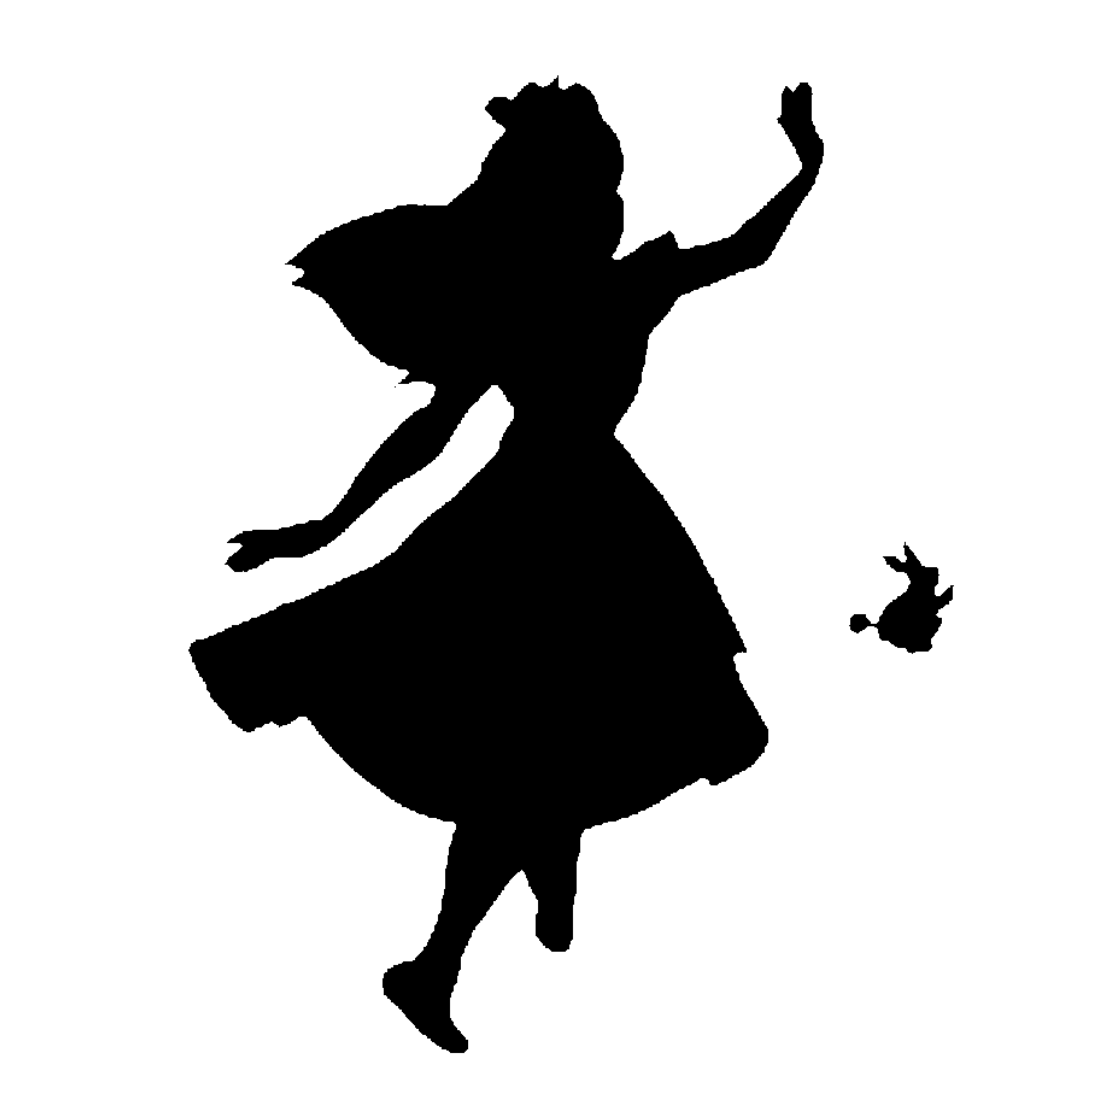

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

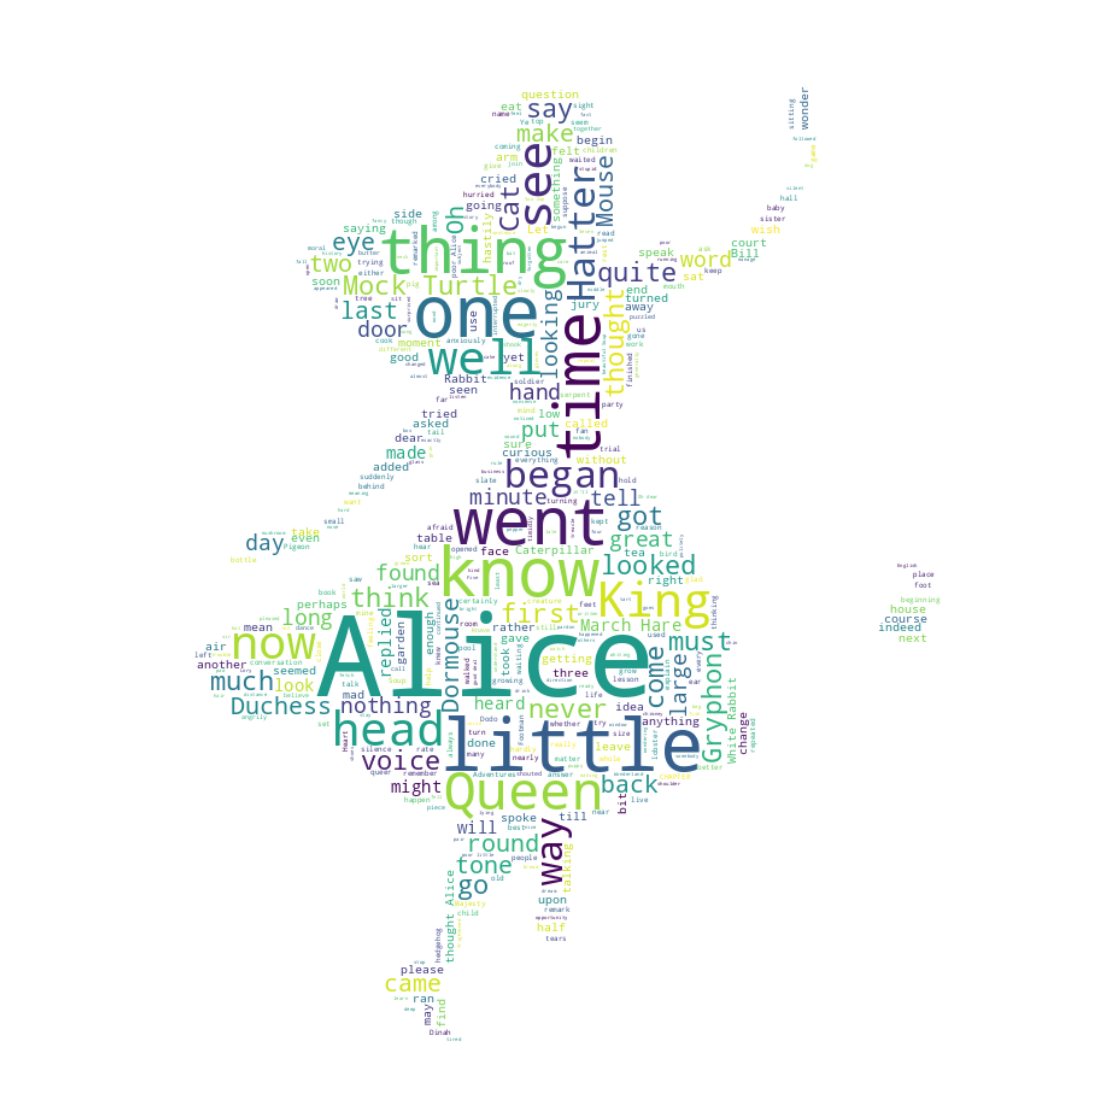

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
alice_wc.generate(alice_novel) # generate the word cloud

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
total_imigration = df_can['Total'].sum()
total_imigration

6409153

In [ ]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_imigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')

Word cloud created!


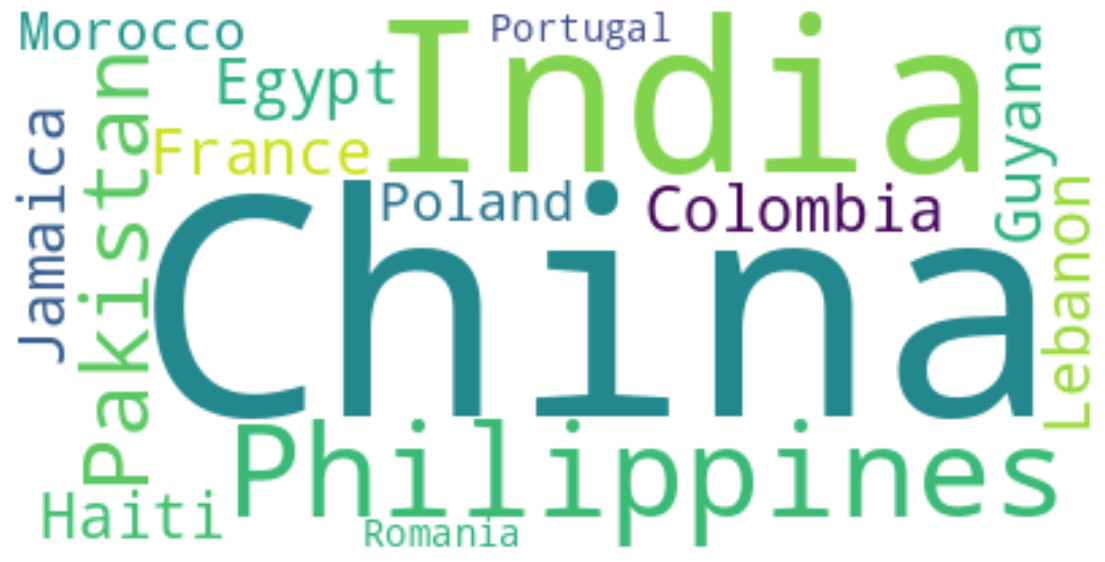

In [ ]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots

In [ ]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float,df_tot.index) # change the years to type float (useful for regression later on)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total'] # rename columns
df_tot.head() # view the final dataframe

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


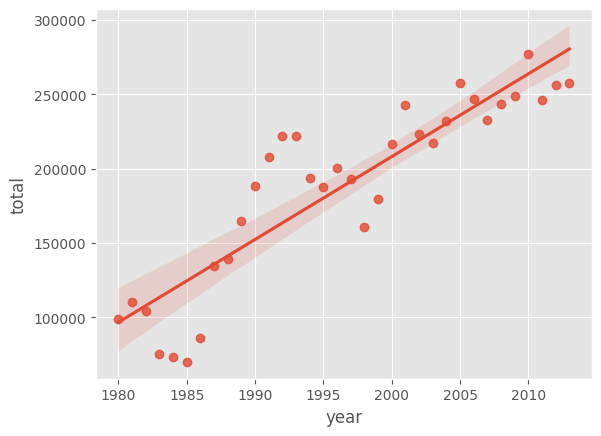

In [ ]:
import seaborn as sns
ax=sns.regplot(x='year', y='total', data=df_tot)

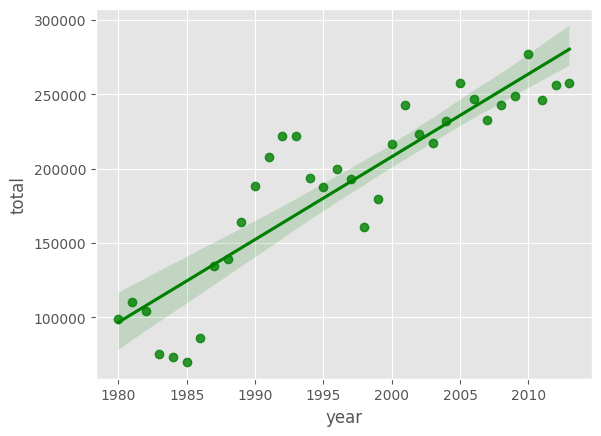

In [ ]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

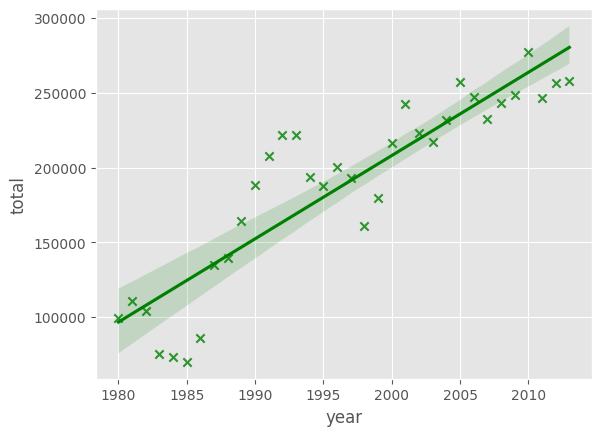

In [ ]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x')

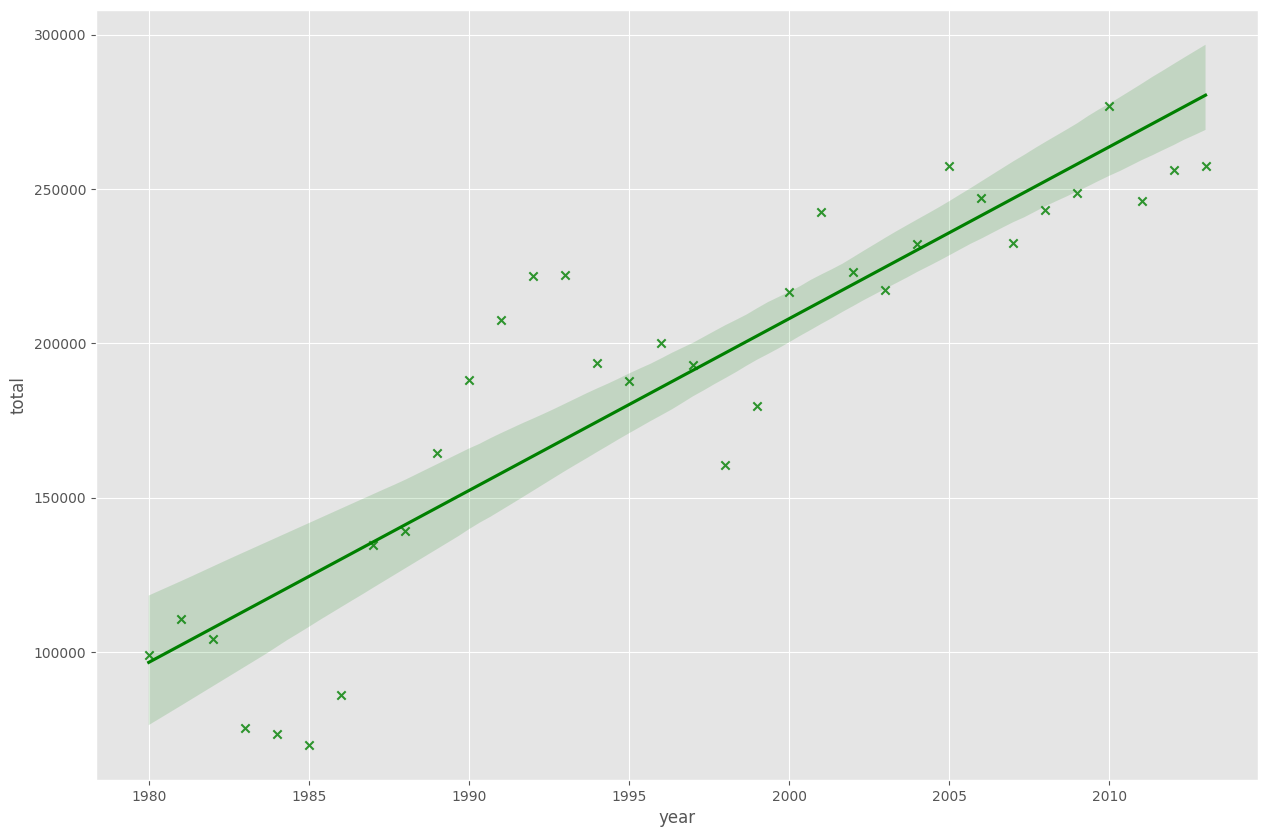

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

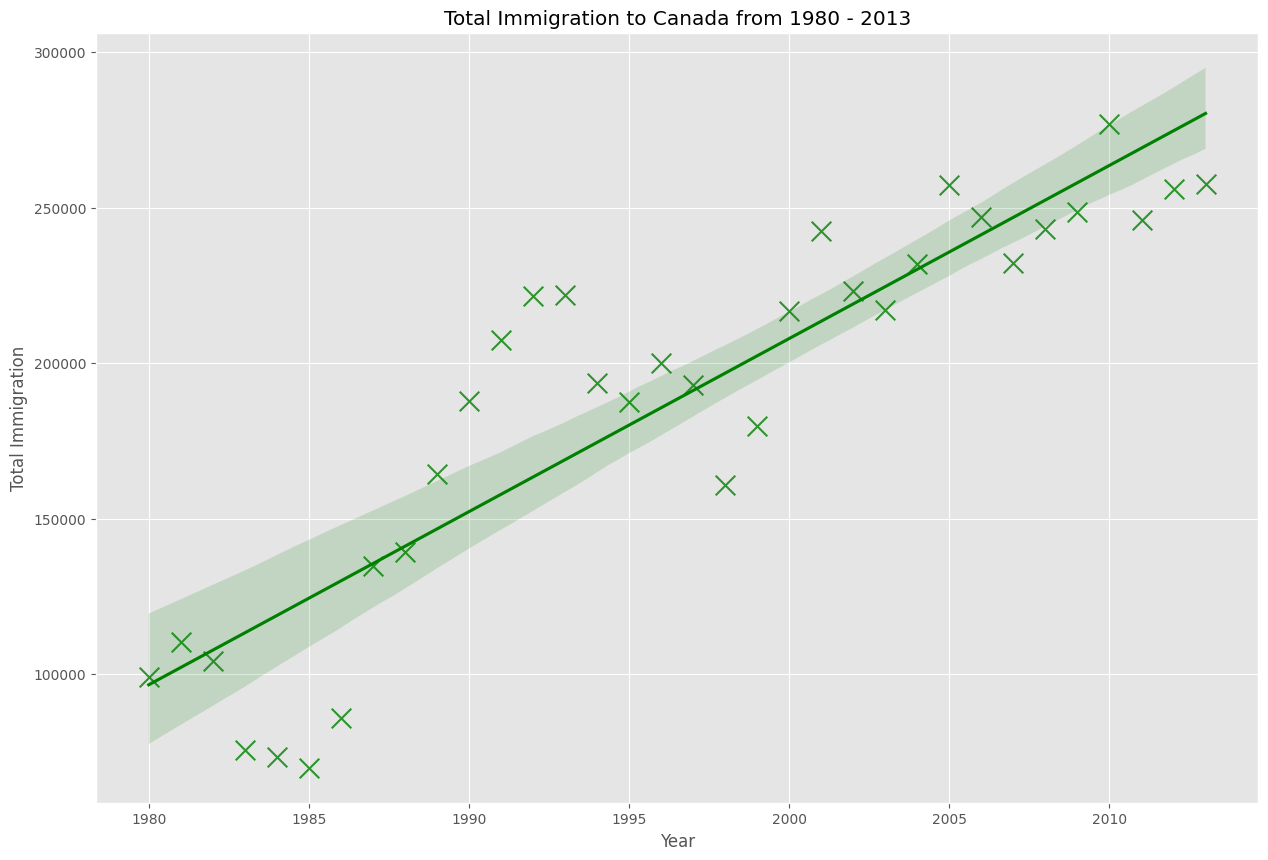

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

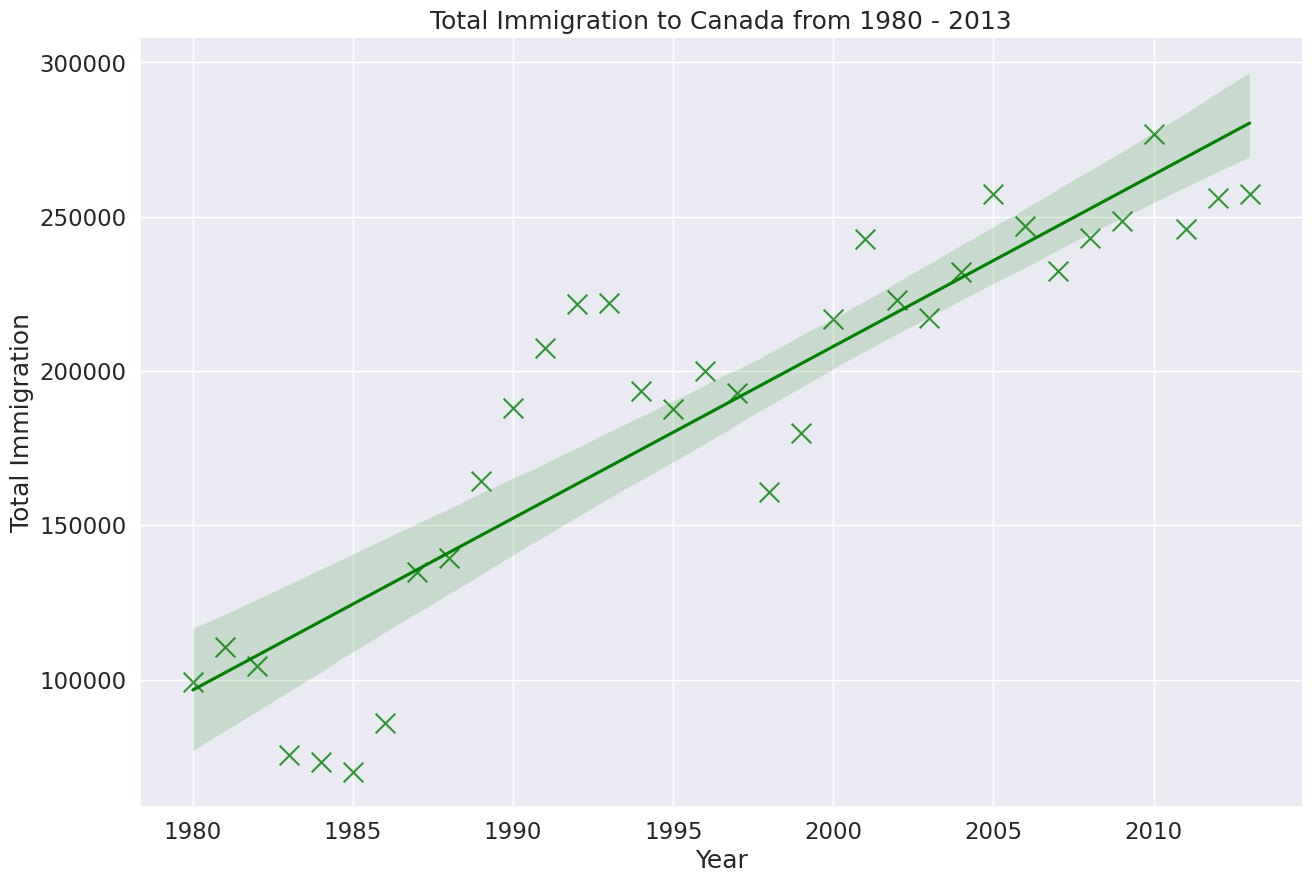

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

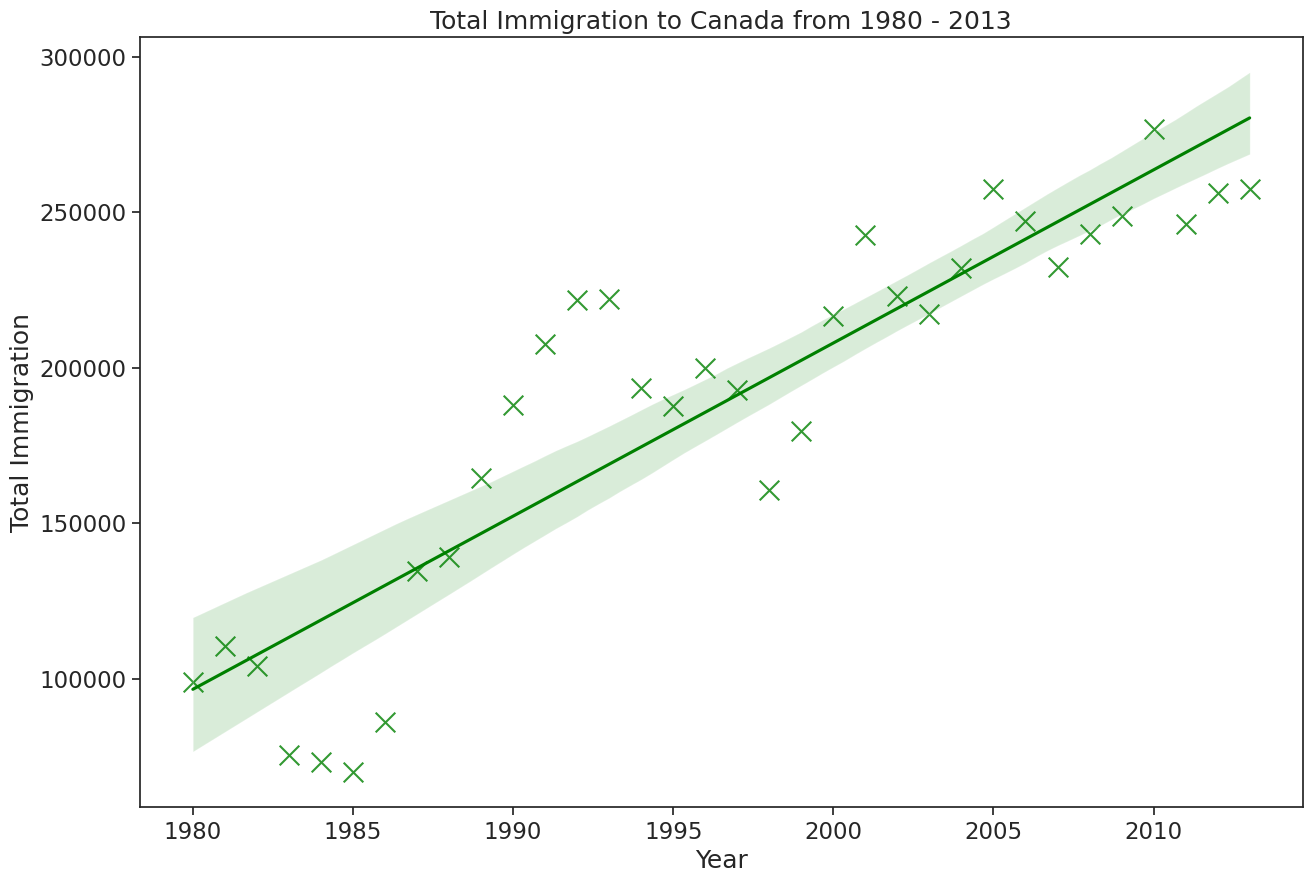

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

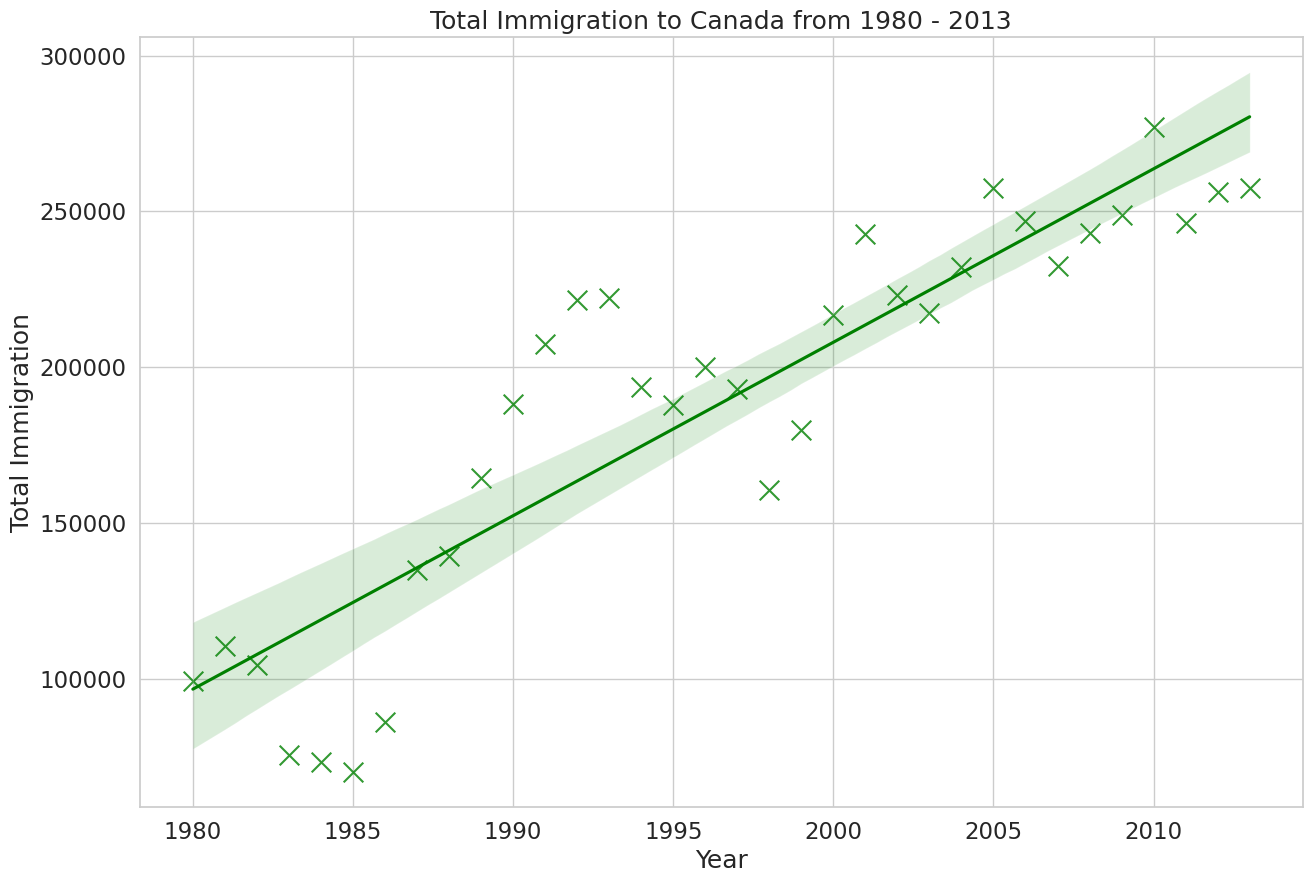

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='x', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

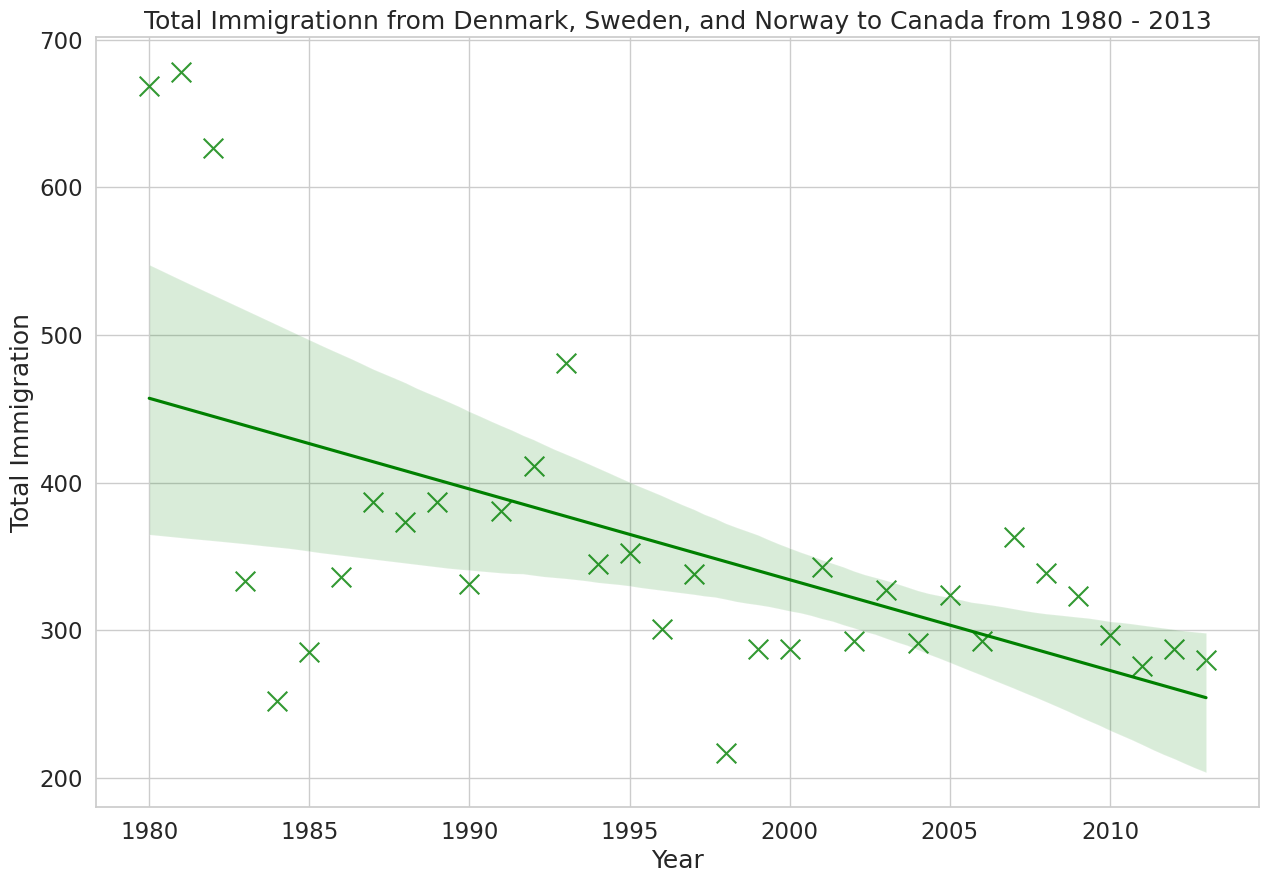

In [ ]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='x', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# Hacktiv8-PTP Python For Data Science // S.8.2 // Advanced Visualization

### Folium

In [ ]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [ ]:
import folium

In [ ]:
world_map = folium.Map()
world_map

In [ ]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)
world_map

In [ ]:
world_map=folium.Map(location=[-6.992620, 110.428009], zoom_start=11)
world_map

#### Question: Create a map of Hacktiv8 with zoom level of 15

In [ ]:
world_map=folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
world_map

In [ ]:
#membuat peta stamen toner semarang dengan tingkat zoom 13
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')
world_map

In [ ]:
#membuat a stamen terrain semarang dengan tingkat zoom 13
world_map=folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')
world_map

In [ ]:
df_incidents=pd.read_csv('datasets/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset download and read into a pandas dataframe!')

Dataset download and read into a pandas dataframe!


In [ ]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
df_incidents.shape

(150500, 13)

In [ ]:
limit=100
df_incidents=df_incidents.iloc[0:limit, :]

In [ ]:
df_incidents.shape

(100, 13)

In [ ]:
latitude=37.77
longitude=-122.42

In [ ]:
sanfran_map=folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [ ]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
#membuat map dan display
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X,
df_incidents.Category):
    folium.CircleMarker([lat, lng], radius=5, color='yellow', fill=True, popup=label, fill_color='blue', fill_opacity=0.6).add_to(sanfran_map)
sanfran_map

In [ ]:
from folium import plugins
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(location=[lat, lng], icon=None, popup=label,).add_to(incidents)
sanfran_map

### Choropleth Maps

In [82]:
df_can.head()

,index,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [83]:
df_can.shape

(195, 40)

In [84]:
df_can.reset_index(inplace=True)

In [85]:
world_geo=r'datasets/World_countries.json'

In [86]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')

In [87]:
world_map.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


FileNotFoundError: ignored

In [88]:
world_map